In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from data.data_cleaning import *

%matplotlib inline

In [2]:
data = pd.read_csv('data/churn_train.csv')
dat = data.copy()

In [3]:
dat.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,6.94,5.0,5.0,1.00,Astapor,2014-05-03,Android,2014-01-12,0.0,0,False,100.0
1,8.06,5.0,5.0,1.00,Astapor,2014-01-26,Android,2014-01-25,0.0,2,True,0.0
2,21.50,4.0,NaN,1.00,Winterfell,2014-05-21,iPhone,2014-01-02,0.0,1,True,100.0
3,9.46,5.0,NaN,2.75,Winterfell,2014-01-10,Android,2014-01-09,100.0,1,False,100.0
4,13.77,5.0,NaN,1.00,Winterfell,2014-05-13,iPhone,2014-01-31,0.0,0,False,100.0


In [4]:
dat = create_target(dat)

In [5]:
dat.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn
0,6.94,5.0,5.0,1.00,Astapor,2014-05-03,Android,2014-01-12,0.0,0,False,100.0,1
1,8.06,5.0,5.0,1.00,Astapor,2014-01-26,Android,2014-01-25,0.0,2,True,0.0,1
2,21.50,4.0,NaN,1.00,Winterfell,2014-05-21,iPhone,2014-01-02,0.0,1,True,100.0,1
3,9.46,5.0,NaN,2.75,Winterfell,2014-01-10,Android,2014-01-09,100.0,1,False,100.0,1
4,13.77,5.0,NaN,1.00,Winterfell,2014-05-13,iPhone,2014-01-31,0.0,0,False,100.0,1


In [6]:
dat.isnull().sum()/dat.shape[0]

avg_dist                  0.000000
avg_rating_by_driver      0.004050
avg_rating_of_driver      0.163200
avg_surge                 0.000000
city                      0.000000
last_trip_date            0.000000
phone                     0.007975
signup_date               0.000000
surge_pct                 0.000000
trips_in_first_30_days    0.000000
luxury_car_user           0.000000
weekday_pct               0.000000
churn                     0.000000
dtype: float64

In [7]:
dat.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,churn
count,40000.000000,39838.000000,33472.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,5.791302,4.777434,4.601697,1.074956,8.857342,2.280700,60.874382,0.624200
std,5.708056,0.448088,0.614810,0.222427,20.014008,3.811289,37.089619,0.484335
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000,0.000000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000,1.000000
75%,6.930000,5.000000,5.000000,1.050000,8.300000,3.000000,100.000000,1.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000,1.000000


In [8]:
df = clean_data(dat)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 15 columns):
avg_dist                  40000 non-null float64
avg_rating_by_driver      40000 non-null float64
avg_rating_of_driver      40000 non-null float64
avg_surge                 40000 non-null float64
city                      40000 non-null object
last_trip_date            40000 non-null datetime64[ns]
phone                     40000 non-null object
signup_date               40000 non-null datetime64[ns]
surge_pct                 40000 non-null float64
trips_in_first_30_days    40000 non-null int64
luxury_car_user           40000 non-null int64
weekday_pct               40000 non-null float64
churn                     40000 non-null int64
rating_of_driver          40000 non-null int64
rating_by_driver          40000 non-null int64
dtypes: datetime64[ns](2), float64(6), int64(5), object(2)
memory usage: 4.6+ MB


In [10]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn,rating_of_driver,rating_by_driver
0,6.94,5.0,5.0,1.00,Astapor,2014-05-03,Android,2014-01-12,0.0,0,0,100.0,1,0,0
1,8.06,5.0,5.0,1.00,Astapor,2014-01-26,Android,2014-01-25,0.0,2,1,0.0,1,0,0
2,21.50,4.0,-1.0,1.00,Winterfell,2014-05-21,iPhone,2014-01-02,0.0,1,1,100.0,1,0,0
3,9.46,5.0,-1.0,2.75,Winterfell,2014-01-10,Android,2014-01-09,100.0,1,0,100.0,1,0,0
4,13.77,5.0,-1.0,1.00,Winterfell,2014-05-13,iPhone,2014-01-31,0.0,0,0,100.0,1,0,0


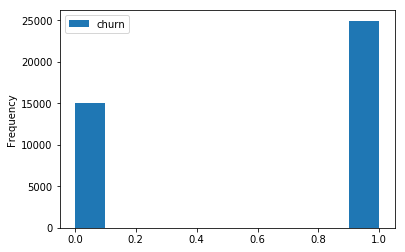

In [11]:
dat.plot(y = 'churn', kind = 'hist')


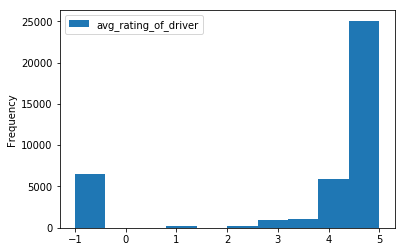

In [12]:
dat.plot(y = 'avg_rating_of_driver', kind = 'hist')

Text(0,0.5,'Number of signups')

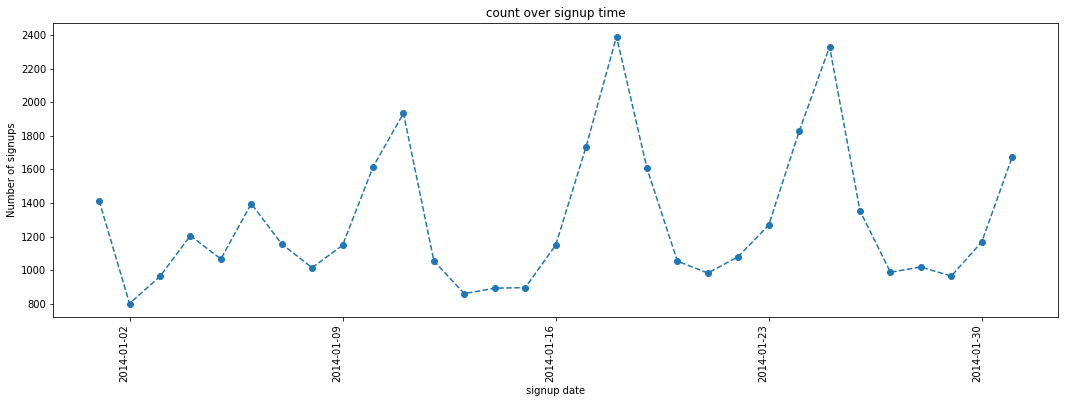

In [13]:
signup_cnt = df.groupby('signup_date').size().reset_index(name='cnt').sort_values(by='signup_date')
fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(signup_cnt['signup_date'],signup_cnt['cnt'],'o--')
ax.set_title('count over signup time')
ax.set_xlabel('signup date')
fig.autofmt_xdate(rotation=90)
ax.set_ylabel('Number of signups')

Text(0,0.5,'Number of last_trip')

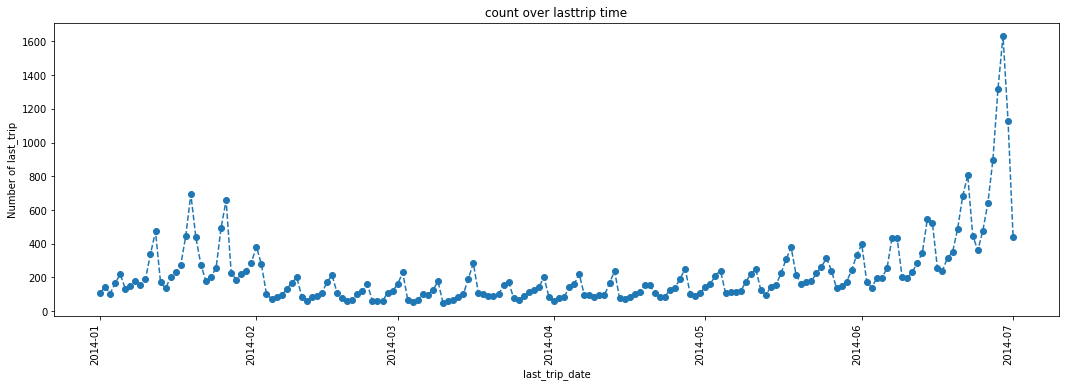

In [14]:
signup_cnt = df.groupby('last_trip_date').size().reset_index(name='cnt').sort_values(by='last_trip_date')
fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(signup_cnt['last_trip_date'],signup_cnt['cnt'],'o--')
ax.set_title('count over lasttrip time')
ax.set_xlabel('last_trip_date')
fig.autofmt_xdate(rotation=90)
ax.set_ylabel('Number of last_trip')

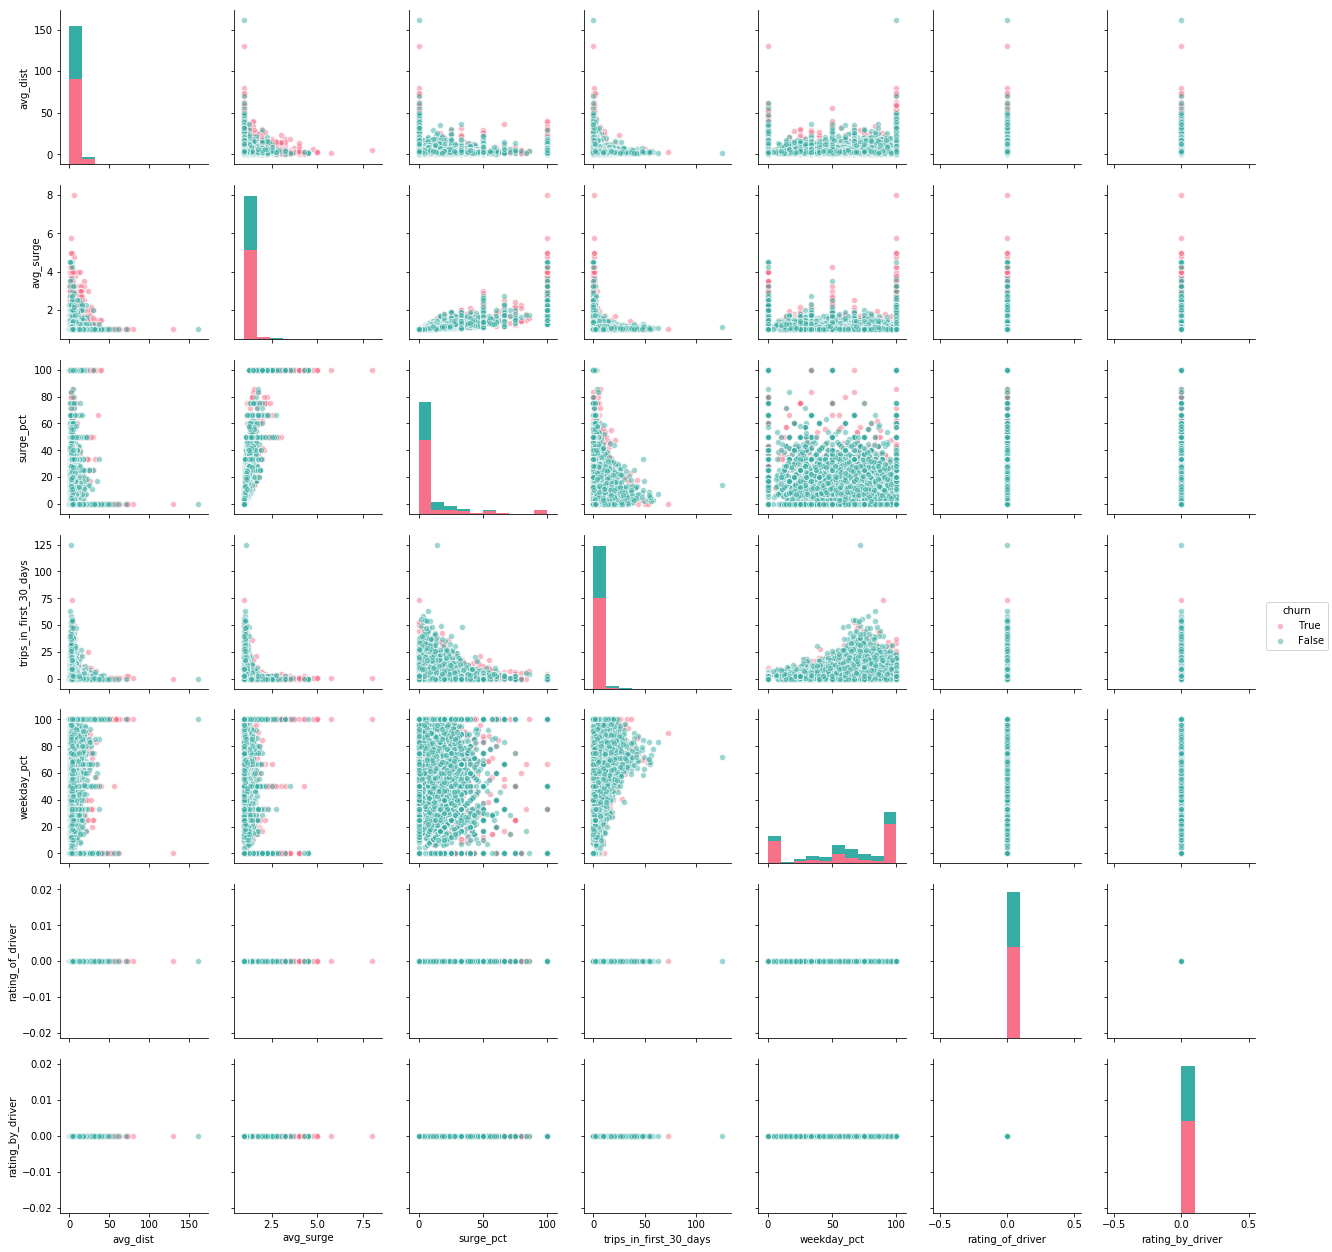

In [15]:
dff = df.drop(['city','last_trip_date','phone','luxury_car_user','signup_date','avg_rating_by_driver','avg_rating_of_driver'],axis=1)
dff['churn'] = dff['churn'].astype(bool).astype(str)
sns.pairplot(dff, hue="churn", palette="husl", plot_kws=dict(alpha=0.5))

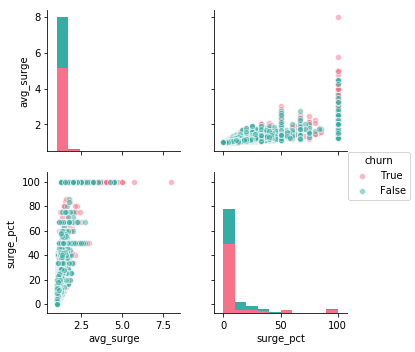

In [16]:
sns.pairplot(dff[['avg_surge','surge_pct','churn']], hue="churn", palette="husl",plot_kws=dict(alpha=0.5), aspect=1.0)

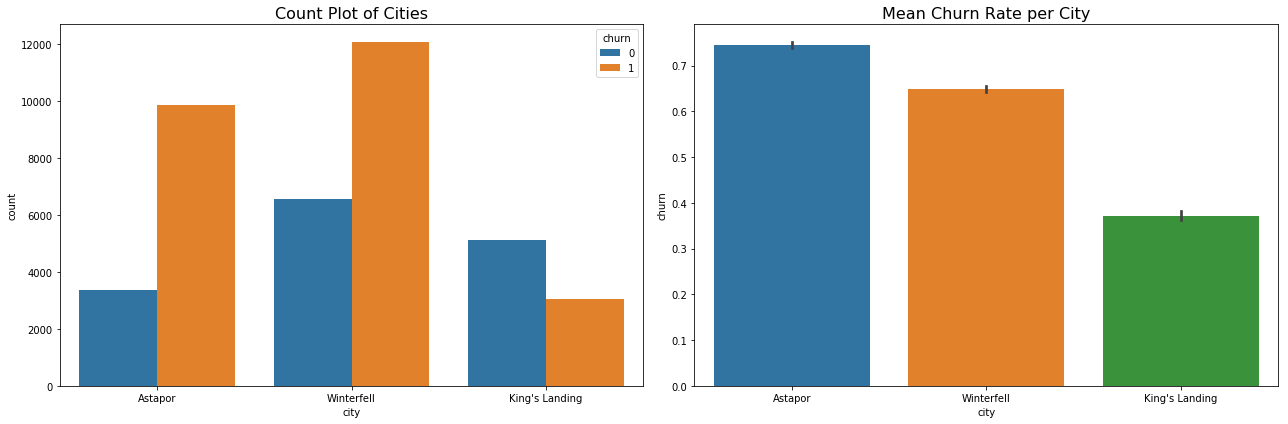

In [17]:
grouped = df[['city', 'churn']].groupby('city').mean().reset_index()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='city', hue='churn', data=df, ax=ax[0])
ax[0].set_title('Count Plot of Cities', fontsize=16)
#ax[0].set_yscale('log')
sns.barplot(x='city', y='churn', data=df, ax=ax[1]);
ax[1].set_title('Mean Churn Rate per City', fontsize=16)
plt.tight_layout()
plt.show()

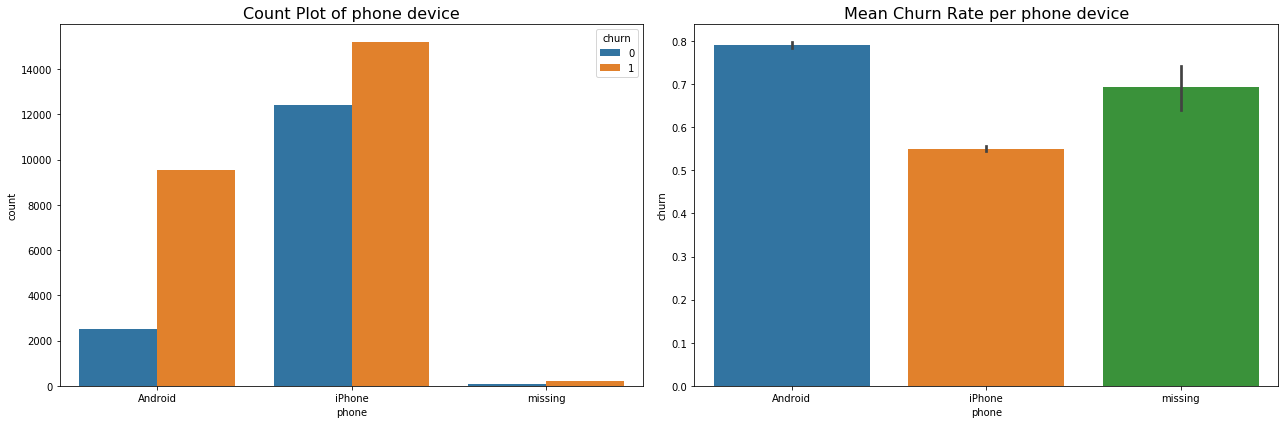

In [18]:
# Visualization of different cities
grouped = df[['phone', 'churn']].groupby('phone').mean().reset_index()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='phone', hue='churn', data=df, ax=ax[0])
ax[0].set_title('Count Plot of phone device', fontsize=16)
#ax[0].set_yscale('log')
sns.barplot(x='phone', y='churn', data=df, ax=ax[1]);
ax[1].set_title('Mean Churn Rate per phone device', fontsize=16)
plt.tight_layout()
plt.show()

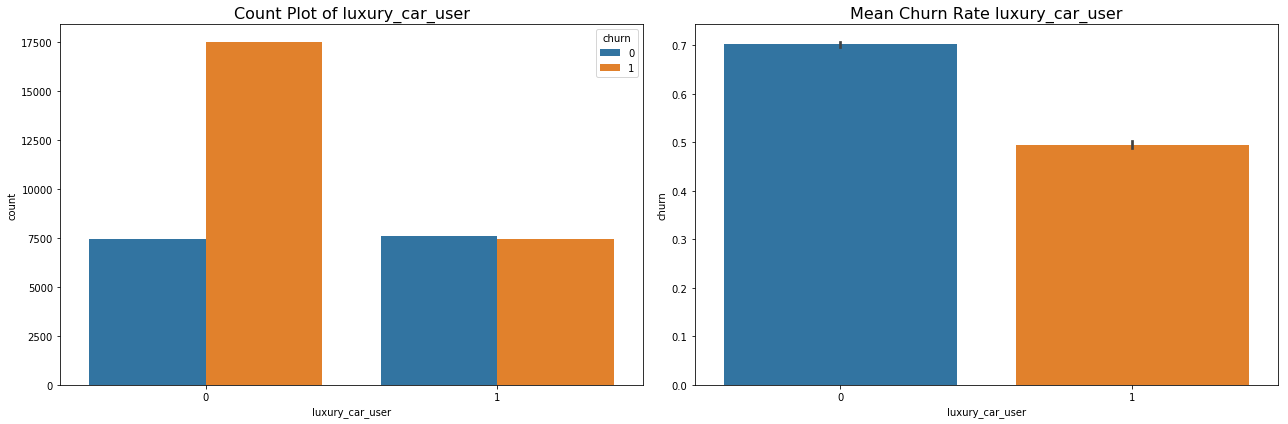

In [19]:
grouped = df[['luxury_car_user', 'churn']].groupby('luxury_car_user').mean().reset_index()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='luxury_car_user', hue='churn', data=df, ax=ax[0])
ax[0].set_title('Count Plot of luxury_car_user', fontsize=16)
#ax[0].set_yscale('log')
sns.barplot(x='luxury_car_user', y='churn', data=df, ax=ax[1]);
ax[1].set_title('Mean Churn Rate luxury_car_user', fontsize=16)
plt.tight_layout()
plt.show()

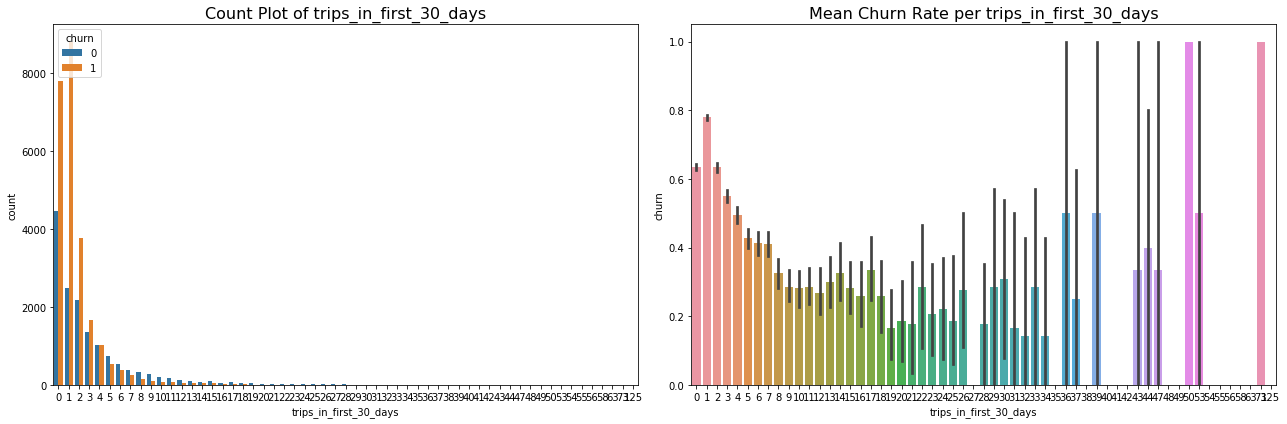

In [20]:
grouped = df[['trips_in_first_30_days', 'churn']].groupby('trips_in_first_30_days').mean().reset_index()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='trips_in_first_30_days', hue='churn', data=df, ax=ax[0])
ax[0].set_title('Count Plot of trips_in_first_30_days', fontsize=16)
#ax[0].set_yscale('log')
sns.barplot(x='trips_in_first_30_days', y='churn', data=df, ax=ax[1]);
ax[1].set_title('Mean Churn Rate per trips_in_first_30_days', fontsize=16)
plt.tight_layout()
plt.show()

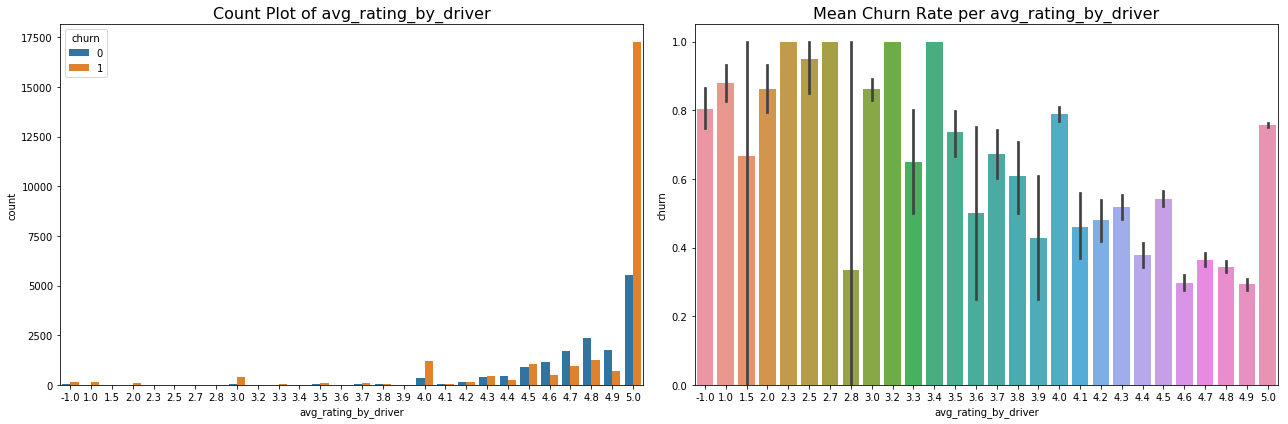

In [21]:
grouped = df[['avg_rating_by_driver', 'churn']].groupby('avg_rating_by_driver').mean().reset_index()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='avg_rating_by_driver', hue='churn', data=df, ax=ax[0])
ax[0].set_title('Count Plot of avg_rating_by_driver', fontsize=16)
#ax[0].set_yscale('log')
sns.barplot(x='avg_rating_by_driver', y='churn', data=df, ax=ax[1]);
ax[1].set_title('Mean Churn Rate per avg_rating_by_driver', fontsize=16)
plt.tight_layout()
plt.show()

In [22]:
df_test = pd.read_csv('data/churn.csv')
np.mean(df_test['avg_rating_by_driver'])

4.778158195947439

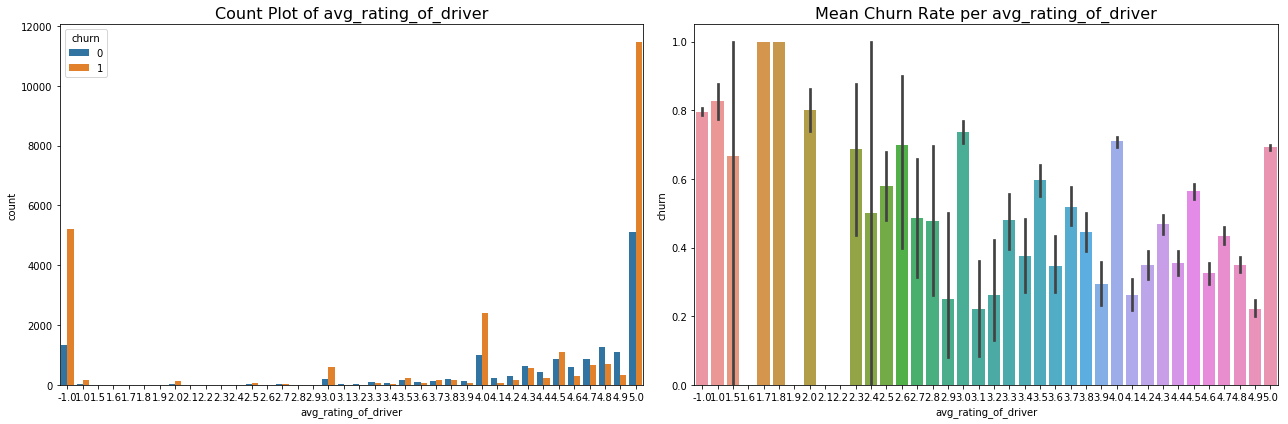

In [23]:
grouped = df[['avg_rating_of_driver', 'churn']].groupby('avg_rating_of_driver').mean().reset_index()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='avg_rating_of_driver', hue='churn', data=df, ax=ax[0])
ax[0].set_title('Count Plot of avg_rating_of_driver', fontsize=16)
#ax[0].set_yscale('log')
sns.barplot(x='avg_rating_of_driver', y='churn', data=df, ax=ax[1]);
ax[1].set_title('Mean Churn Rate per avg_rating_of_driver', fontsize=16)
plt.tight_layout()
plt.show()

In [24]:
df_test = pd.read_csv('data/churn.csv')
np.mean(df_test['avg_rating_of_driver'])

4.6015592912744685

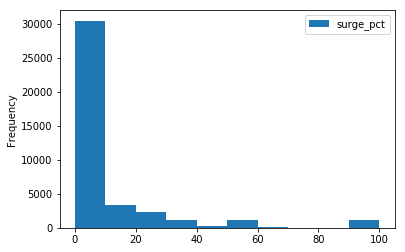

In [25]:
df.plot(y = 'surge_pct', kind = 'hist')

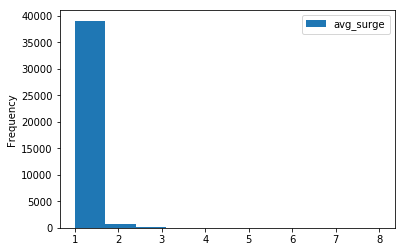

In [26]:
df.plot(y = 'avg_surge', kind = 'hist')